In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# Loading Breast cancer data set
data = load_breast_cancer()
x, y = data.data, data.target
feature_names = list(data.feature_names)

# Fill Missing Values with mean 
df = pd.DataFrame(x)
df.fillna(df.mean(), inplace = True)

# Remove Duplicated Rows
duplicates = df.duplicated().sum()
df_cleaned = df.drop_duplicates()
print(f"Number of duplicates removed: {duplicates}")
print(df_cleaned.head())

Number of duplicates removed: 0
      0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        9   ...     20     21      22      23      24      25      26      27  \
0  0.07871  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       28   

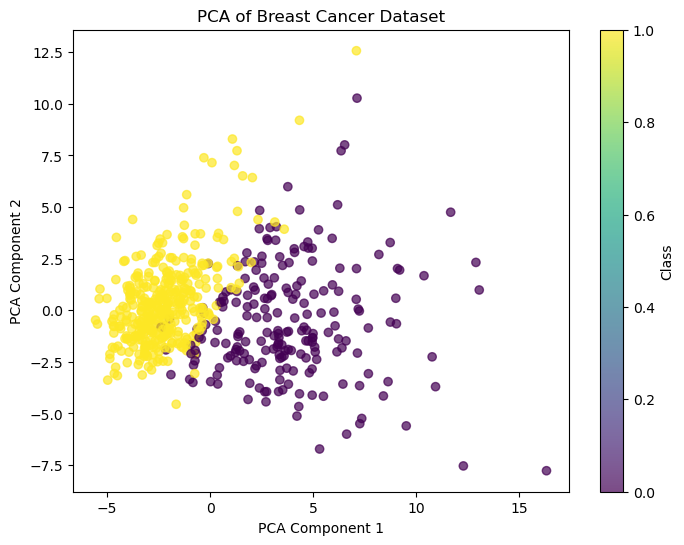

In [38]:
# Using Scaling to standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

# Use PCA to reduce dataset into 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Highlight the most influential features 
components_df = pd.DataFrame(pca.components_, columns=feature_names)
"""print("Most influential features for each principal component:")
print(components_df.T)"""

# Visualize the PCA-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.colorbar(label='Class')
plt.show()

In [39]:
#Implement logistic regression using PCA-reduced data
# Split the PCA data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(f'Logistic Regression Accuracy: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9912280701754386
Logistic Regression Accuracy: 99.12%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

